In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical

In [ ]:
images=np.load('/content/drive/MyDrive/images.npy')
labels=np.load('/content/drive/MyDrive/labels.npy')
print(images.shape)
print(labels.shape)

(21785, 69, 69, 3)
(21785,)


In [ ]:
lookup=["Disturbed Galaxies", "Merging Galaxies", "Round Smooth Galaxies", "In-between Round Smooth Galaxies",
        "Cigar Shaped Smooth Galaxies", "Barred Spiral Galaxies", "Unbarred Tight Spiral Galaxies",
        "Unbarred Loose Spiral Galaxies", "Edge-on Galaxies without Bulge", "Edge-on Galaxies with Bulge"]


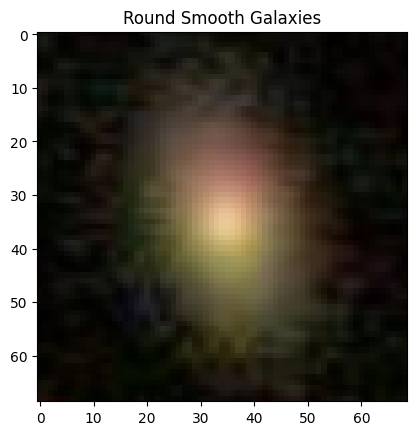

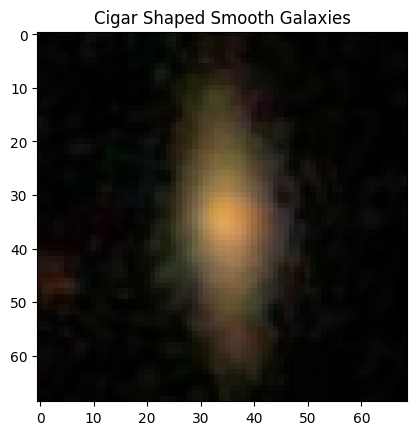

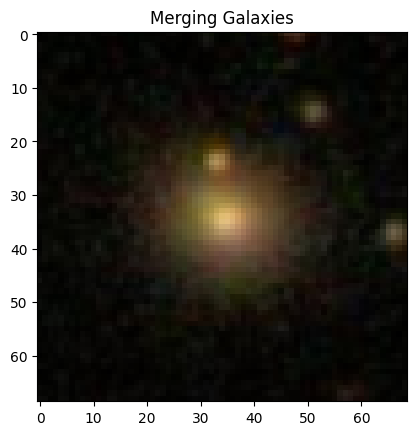

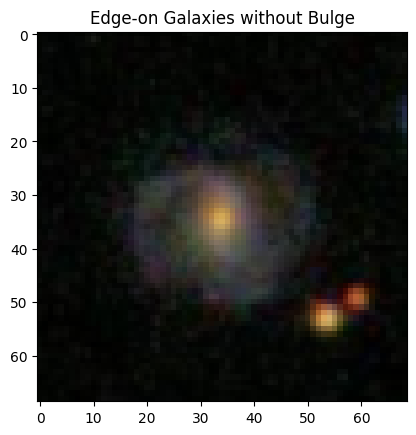

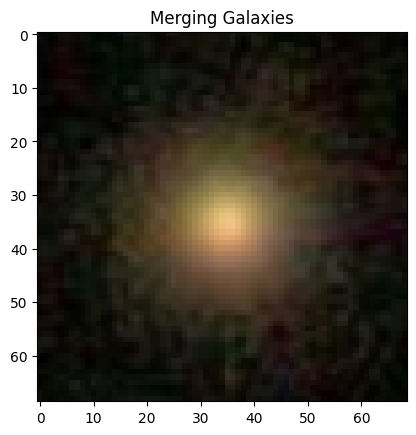

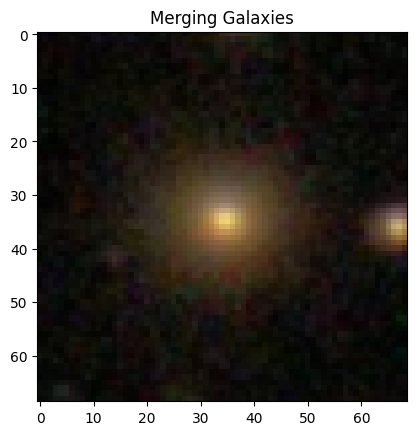

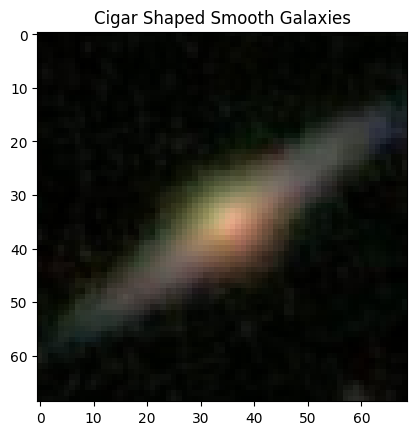

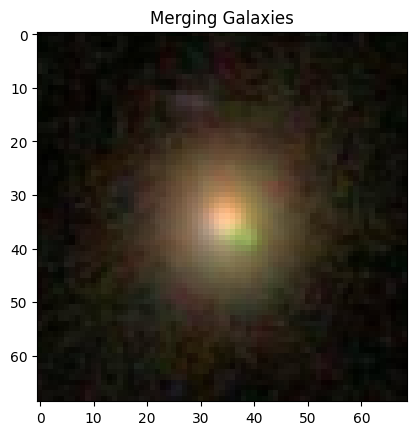

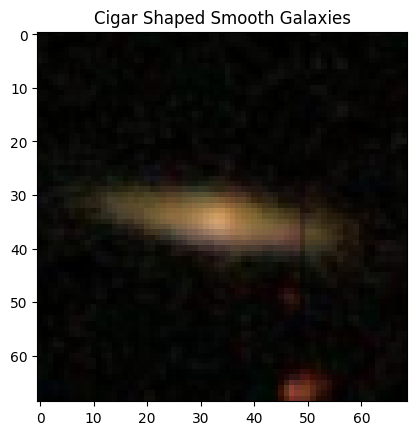

In [ ]:
l=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
for i in l:
    plt.imshow(images[i])
    plt.title(lookup[labels[i]])
    plt.show()

In [ ]:
import cv2
grayscale_dataset = np.empty((images.shape[0], images.shape[1], images.shape[2]), dtype=np.uint8)
for i in range(images.shape[0]):
    rgb_image = images[i]
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
    grayscale_dataset[i] = gray_image
print(grayscale_dataset.shape)

(21785, 69, 69)


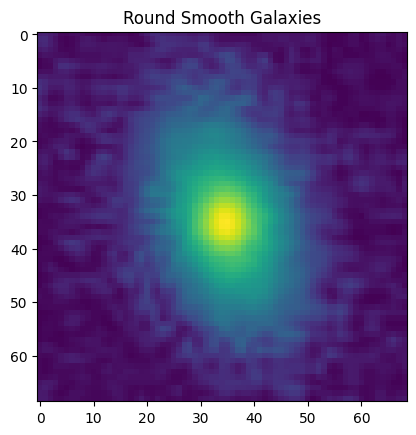

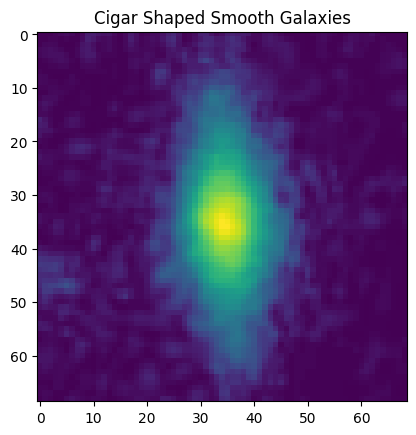

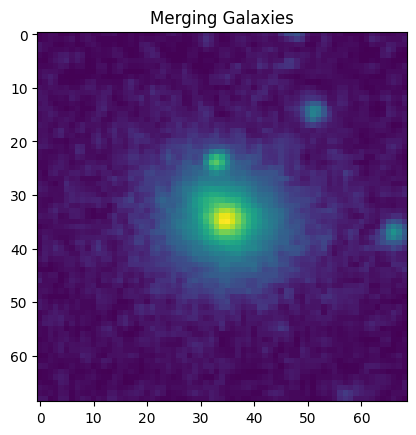

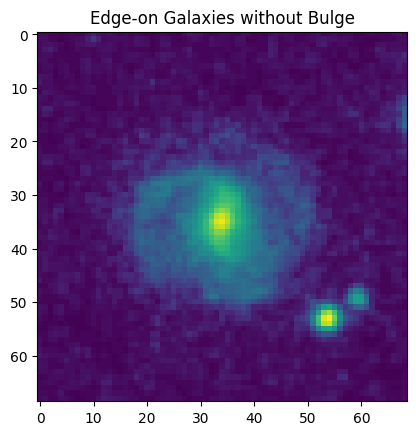

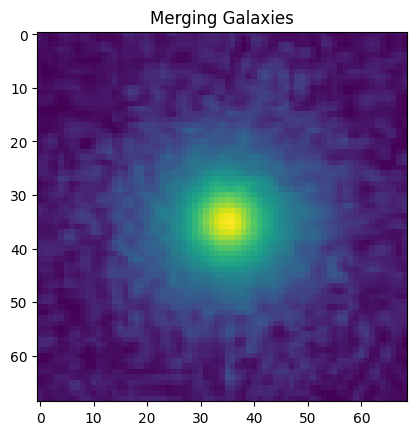

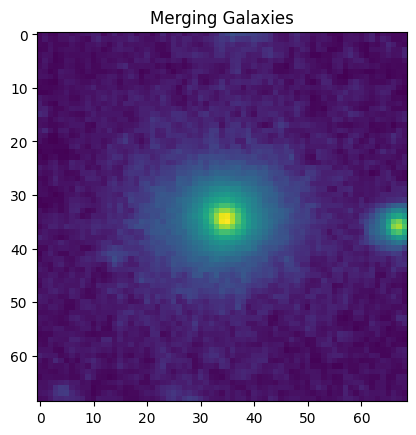

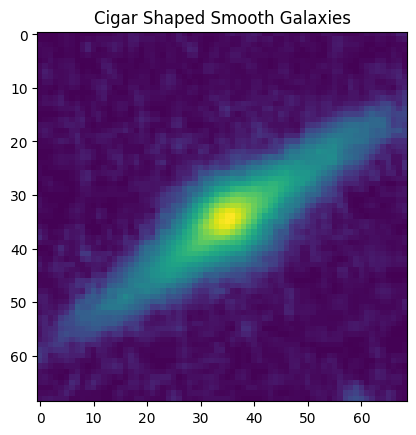

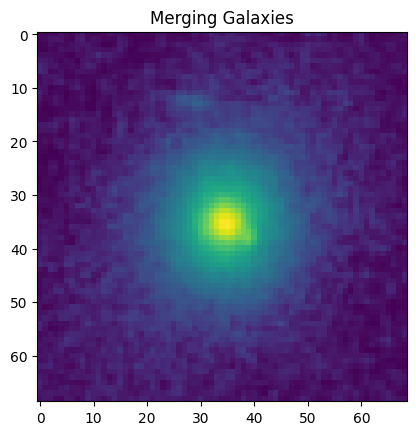

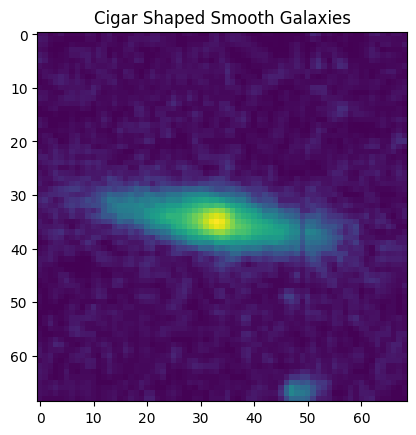

In [ ]:
grayscale_dataset=grayscale_dataset.reshape(grayscale_dataset.shape[0], 69, 69, 1)
l=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
for i in l:
    plt.imshow(grayscale_dataset[i])
    plt.title(lookup[labels[i]])
    plt.show()

In [ ]:
print(grayscale_dataset.shape)

(21785, 69, 69, 1)


In [ ]:
images=grayscale_dataset
images=images.astype('float32')
images /= 255
labels = to_categorical(labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17428, 69, 69, 1)
(17428, 10)
(4357, 69, 69, 1)
(4357, 10)


In [ ]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(69, 69, 1)))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 67, 67, 32)        320       
                                                                 
 conv2d_41 (Conv2D)          (None, 65, 65, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
545/545 [==============================] - 16s 20ms/step - loss: 1.3383 - accuracy: 0.4910 - val_loss: 0.9020 - val_accuracy: 0.6580
Epoch 2/15
545/545 [==============================] - 10s 19ms/step - loss: 0.9453 - accuracy: 0.6476 - val_loss: 0.7813 - val_accuracy: 0.7108
Epoch 3/15
545/545 [==============================] - 10s 19ms/step - loss: 0.8420 - accuracy: 0.6872 - val_loss: 0.6936 - val_accuracy: 0.7549
Epoch 4/15
545/545 [==============================] - 11s 20ms/step - loss: 0.7792 - accuracy: 0.7159 - val_loss: 0.7093 - val_accuracy: 0.7478
Epoch 5/15
545/545 [==============================] - 10s 19ms/step - loss: 0.7439 - accuracy: 0.7322 - val_loss: 0.6641 - val_accuracy: 0.7620
Epoch 6/15
545/545 [==============================] - 11s 20ms/step - loss: 0.7054 - accuracy: 0.7470 - val_loss: 0.6440 - val_accuracy: 0.7739
Epoch 7/15
545/545 [==============================] - 11s 20ms/step - loss: 0.6800 - accuracy: 0.7545 - val_loss: 0.6479 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

137/137 [==============================] - 1s 7ms/step - loss: 0.6315 - accuracy: 0.7762
Test Loss: 0.6315305233001709
Test Accuracy: 0.7762221693992615


In [ ]:
# resnet